# National Crime Data by State

## Final Project : Data Visualization


### NOTE: Change the kernel to the type of your choice, `R` or `Python`.

  * Navigation: Kernel > Change Kernel > [Selection]


## Crime Trends Analysis 

### Data Files:
  
  * ../../../datasets/ucr_fbi/1994.csv
  * ../../../datasets/ucr_fbi/1996.csv
  * ../../../datasets/ucr_fbi/1998.csv
  * ../../../datasets/ucr_fbi/2000.csv
  * ../../../datasets/ucr_fbi/2002.csv
  * ../../../datasets/ucr_fbi/2004.csv
  * ../../../datasets/ucr_fbi/2006.csv
  * ../../../datasets/ucr_fbi/2008.csv
  * ../../../datasets/ucr_fbi/2010.csv
  * ../../../datasets/ucr_fbi/2012.csv
  * ../../../datasets/ucr_fbi/2014.csv



# Task 1)

Load data files into a collection of data frames.

In [58]:
data94 <- read.csv("../../../datasets/ucr_fbi/1994.csv")
row.names(data94) <- data94$State
head(data94)

,State,Population,Violent.crime.total,Murder.and.nonnegligent.Manslaughter,Legacy.rape..1,Revised.rape..2,Robbery,Aggravated.assault,Property.crime.total,Burglary,⋯,Murder.and.nonnegligent.manslaughter.rate,Legacy.rape.rate..1,Revised.rape.rate..2,Robbery.rate,Aggravated.assault.rate,Property.crime.rate,Burglary.rate,Larceny.theft.rate,Motor.vehicle.theft.rate,X
Alabama,Alabama,4219000,28844,501,1487,NA,7223,19633,178015,44064,⋯,11.9,35.2,NA,171.2,465.3,4219.4,1044.4,2843.1,331.8,NA
Alaska,Alaska,606000,4644,38,418,NA,886,3302,29947,4848,⋯,6.3,69.0,NA,146.2,544.9,4941.7,800.0,3601.3,540.4,NA
Arizona,Arizona,4075000,28653,426,1465,NA,6601,20161,294273,60157,⋯,10.5,36.0,NA,162.0,494.7,7221.4,1476.2,4678.5,1066.7,NA
Arkansas,Arkansas,2453000,14598,294,1028,NA,3158,10118,103115,26911,⋯,12.0,41.9,NA,128.7,412.5,4203.6,1097.1,2791.6,315.0,NA
California,California,31431000,318395,3703,10984,NA,112160,191548,1622102,384257,⋯,11.8,34.9,NA,356.8,609.4,5160.8,1222.5,2957.7,980.6,NA
Colorado,Colorado,3656000,18632,199,1579,NA,3910,12944,175808,33843,⋯,5.4,43.2,NA,106.9,354.0,4808.8,925.7,3490.2,392.9,NA


In [ ]:
# Add Your Code Below This Comment
# ---------------------------------

def file_to_df(year):
    fn = "../../../datasets/ucr_fbi/{}.csv".format(year)
    print("Loading: ", fn)
    df = pd.read_csv(fn)
    df['year'] = int(year)
    return (df)

# List Comprehension
# http://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/
years = [year for year in range(1994,2015, 2)]
crime = [file_to_df(year) for year in years]
crime_all = pd.concat(crime)

print(crime_all.shape)


In [ ]:
# Database Connections


con <- dbConnect(drv, host = "dbase.dsa.missouri.edu", port = "5432", 
                 dbname = 'dsa_ro' ,user='dsa_ro_user', password='readonly')



# Just fetch them all
#sql = "SELECT iso,name_1, the_geom "
#sql+= " FROM geospatial.gadm_admin_borders "
# sql+= " WHERE iso IN ('USA') "
# first = all_USA_gadm.dissolve(by=['name_1'])

# Just fetch them all, let DB merge into states
sql = "SELECT name_1, st_union(the_geom) as the_geom "
sql+= " FROM geospatial.gadm_admin_borders "
sql+= " WHERE iso IN ('USA') GROUP BY name_1"


# First order
first = gpd.GeoDataFrame.from_postgis(sql,con,geom_col='the_geom' )
first.head()

In [ ]:
# Trim to lower 48 ... because
conus = first[(first.name_1 != 'Alaska') & (first.name_1 != 'Hawaii')]
conus.shape

In [ ]:
%matplotlib inline
conus.plot(figsize=(15,15), color='white');

### <span style="background:yellow">For each of the remaining tasks, as execution cells as you see fit.  Please keep them group with the task.</span>

# Task 2)
Produce basic visualizations for a few years to get a feeling for the descriptive statistics.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 3)

Produce basic visualizations for a few years to get a feeling for the bivariate relationships in variables within a same year.
E.g., Robbery versus Assult for 1994.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 4)

Produce basic visualizations for a of cross year bivariate relationships.
E.g., Robbery 1994 versus Assult for 1998.


In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 5)

Produce visualizations with regresssions lines for the strongest relationships.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 6)

Create Choropleth of key statistics you want to discuss based on your work so far.
Include every year and variable that is appropriate.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 7)

Choose a particular state, evaluate a relationship between two variables that are positively correlated and produce a sequential set of plots to show the trends in the relationship over time.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 8)

Pick a state, show the chronological choropleth for that state and a critical statistic.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 9)

From tasks 2-8, pull the most interesting visualizations and information down into this task.  Repeat the visualization in preparation of step 10.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 10)

Provide your annotation and summary of your key visualizations from Task 9.

## Choropleth of Countries by Population

In [ ]:
library(pgis2r) #Get spatial poloygons from PostGIS database
library(sp) #Plot spatial data

In [ ]:
#Tell the driver this is for Postgres
drv <- dbDriver("PostgreSQL")

#Open a connection to the dsa_ro database
con <- dbConnect(drv, host = "dbase.dsa.missouri.edu", port = "5432", dbname = 'dsa_ro',user='dsa_ro_user',password='readonly')


In [ ]:
# Use the helper function to pull the geospatial data of the country borders 
Spol_df<-pgis2spol(con,'geospatial.country_borders',geom='the_geom',gid='gid')

#Plot the data with the color as the population 
# Ref: http://gis.stackexchange.com/questions/36877/how-do-i-change-the-polygon-fill-color-and-border-color-for-spatialpolygons-obje
spplot(Spol_df, zcol="pop2005")

## US GADMN to States in R

In [1]:
library(pgis2r) #Get spatial poloygons from PostGIS database
library(sp) #Plot spatial data
#Tell the driver this is for Postgres
drv <- dbDriver("PostgreSQL")

#Open a connection to the dsa_ro database
con <- dbConnect(drv, host = "dbase.dsa.missouri.edu", port = "5432", dbname = 'dsa_ro',user='dsa_ro_user',password='readonly')


Loading required package: RPostgreSQL
Loading required package: DBI
Loading required package: sp
Loading required package: rgdal
rgdal: version: 1.2-5, (SVN revision 648)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 1.11.4, released 2016/01/25
 Path to GDAL shared files: /usr/share/gdal
 Loaded PROJ.4 runtime: Rel. 4.8.0, 6 March 2012, [PJ_VERSION: 480]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-22, (SVN revision 544)
 GEOS runtime version: 3.5.0-CAPI-1.9.0 r4084 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: raster


In [12]:
# Use the helper function to pull the geospatial data of the country borders 
Spol_df<-pgis2spol(con,'geospatial.gadm_admin_borders',
                   other.cols=" name_1, shape_area ",
                   geom='the_geom',gid='gid', query=" AND iso='USA' ")

dim(Spol_df)

head(Spol_df)


[1] 3145    2

,name_1,shape_area
27,Alaska,53.4405591
8507,Maine,0.8221908
7529,North Dakota,0.3112125
7592,North Dakota,0.2216729
8941,South Dakota,0.2518196
8942,South Dakota,0.2345685


In [14]:
# Remove Alaska and Hawaii

conus <- Spol_df[!(Spol_df$name_1 == "Hawaii"  | Spol_df$name_1 == "Alaska"),]

# which(mydata$gender=='F' & mydata$age > 65)

dim(conus)
#Plot the data with the color as the population 
# Ref: http://gis.stackexchange.com/questions/36877/how-do-i-change-the-polygon-fill-color-and-border-color-for-spatialpolygons-obje
#spplot(conus, zcol="shape_area")

[1] 3115    2

In [51]:
state_names = data.frame(unique(conus$name_1))
row.names(state_names) <- state_names$unique.conus.name_1
head(state_names)

,unique.conus.name_1.
Maine,Maine
North Dakota,North Dakota
South Dakota,South Dakota
Michigan,Michigan
Minnesota,Minnesota
Wisconsin,Wisconsin


In [39]:
summary(state_names)

      state_names
 Alabama    : 1  
 Arizona    : 1  
 Arkansas   : 1  
 California : 1  
 Colorado   : 1  
 Connecticut: 1  
 (Other)    :43  

In [47]:
library(maptools)
states <- unionSpatialPolygons(conus, conus$name_1)
# getSpPPolygonsIDSlots(states)


#states_spdf <- as.SpatialPolygonsDataFrame.PolygonsList(states)
#dim(states)
str(states)

Formal class 'SpatialPolygons' [package "sp"] with 4 slots
  ..@ polygons   :List of 49
  .. ..$ :Formal class 'Polygons' [package "sp"] with 5 slots
  .. .. .. ..@ Polygons :List of 23
  .. .. .. .. ..$ :Formal class 'Polygon' [package "sp"] with 5 slots
  .. .. .. .. .. .. ..@ labpt  : num [1:2] -88 30.7
  .. .. .. .. .. .. ..@ area   : num 5.19e-05
  .. .. .. .. .. .. ..@ hole   : logi FALSE
  .. .. .. .. .. .. ..@ ringDir: int 1
  .. .. .. .. .. .. ..@ coords : num [1:70, 1:2] -88 -88 -88 -88 -88 ...
  .. .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. .. ..$ : chr [1:2] "x" "y"
  .. .. .. .. ..$ :Formal class 'Polygon' [package "sp"] with 5 slots
  .. .. .. .. .. .. ..@ labpt  : num [1:2] -88 30.7
  .. .. .. .. .. .. ..@ area   : num 2.35e-05
  .. .. .. .. .. .. ..@ hole   : logi FALSE
  .. .. .. .. .. .. ..@ ringDir: int 1
  .. .. .. .. .. .. ..@ coords : num [1:39, 1:2] -88 -88 -88 -88 -88 ...
  .. .. .. .. .. .. ..

In [71]:
states_df <- SpatialPolygonsDataFrame(states,state_names )

# by = means use row.names
s94 <- merge(states_df, data94, by=0)

head(s94)
names(s94)

Row.names,unique.conus.name_1.,State,Population,Violent.crime.total,Murder.and.nonnegligent.Manslaughter,Legacy.rape..1,Revised.rape..2,Robbery,Aggravated.assault,⋯,Murder.and.nonnegligent.manslaughter.rate,Legacy.rape.rate..1,Revised.rape.rate..2,Robbery.rate,Aggravated.assault.rate,Property.crime.rate,Burglary.rate,Larceny.theft.rate,Motor.vehicle.theft.rate,X
Alabama,Alabama,Alabama,4219000,28844,501,1487,NA,7223,19633,⋯,11.9,35.2,NA,171.2,465.3,4219.4,1044.4,2843.1,331.8,NA
Arizona,Arizona,Arizona,4075000,28653,426,1465,NA,6601,20161,⋯,10.5,36.0,NA,162.0,494.7,7221.4,1476.2,4678.5,1066.7,NA
Arkansas,Arkansas,Arkansas,2453000,14598,294,1028,NA,3158,10118,⋯,12.0,41.9,NA,128.7,412.5,4203.6,1097.1,2791.6,315.0,NA
California,California,California,31431000,318395,3703,10984,NA,112160,191548,⋯,11.8,34.9,NA,356.8,609.4,5160.8,1222.5,2957.7,980.6,NA
Colorado,Colorado,Colorado,3656000,18632,199,1579,NA,3910,12944,⋯,5.4,43.2,NA,106.9,354.0,4808.8,925.7,3490.2,392.9,NA
Connecticut,Connecticut,Connecticut,3275000,14916,215,806,NA,6150,7745,⋯,6.6,24.6,NA,187.8,236.5,4092.5,889.8,2586.9,615.8,NA


[1] "Row.names"                                
 [2] "unique.conus.name_1."                     
 [3] "State"                                    
 [4] "Population"                               
 [5] "Violent.crime.total"                      
 [6] "Murder.and.nonnegligent.Manslaughter"     
 [7] "Legacy.rape..1"                           
 [8] "Revised.rape..2"                          
 [9] "Robbery"                                  
[10] "Aggravated.assault"                       
[11] "Property.crime.total"                     
[12] "Burglary"                                 
[13] "Larceny.theft"                            
[14] "Motor.vehicle.theft"                      
[15] "Violent.Crime.rate"                       
[16] "Murder.and.nonnegligent.manslaughter.rate"
[17] "Legacy.rape.rate..1"                      
[18] "Revised.rape.rate..2"                     
[19] "Robbery.rate"                             
[20] "Aggravated.assault.rate"                  
[21] "Property.crime.rate"                      
[22] "Burglary.rate"                            
[23] "Larceny.theft.rate"                       
[24] "Motor.vehicle.theft.rate"                 
[25] "X"

Warning message in lapply(xd, as.numeric):
“NAs introduced by coercion”

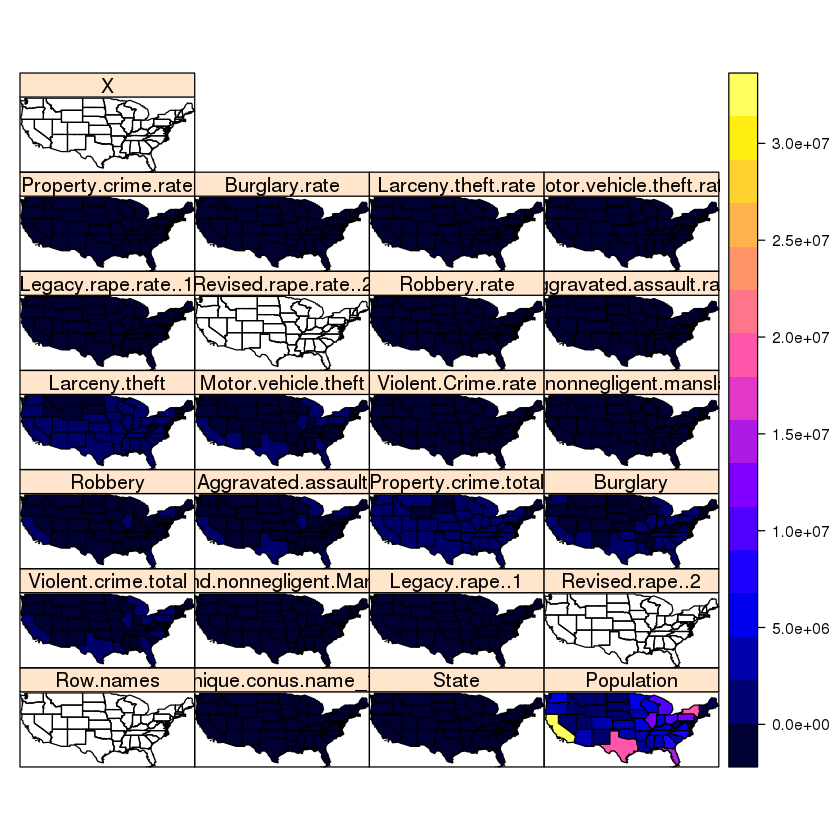

In [73]:
#spplot(s94, zcol="Violent.Crime.rate")
spplot(s94)

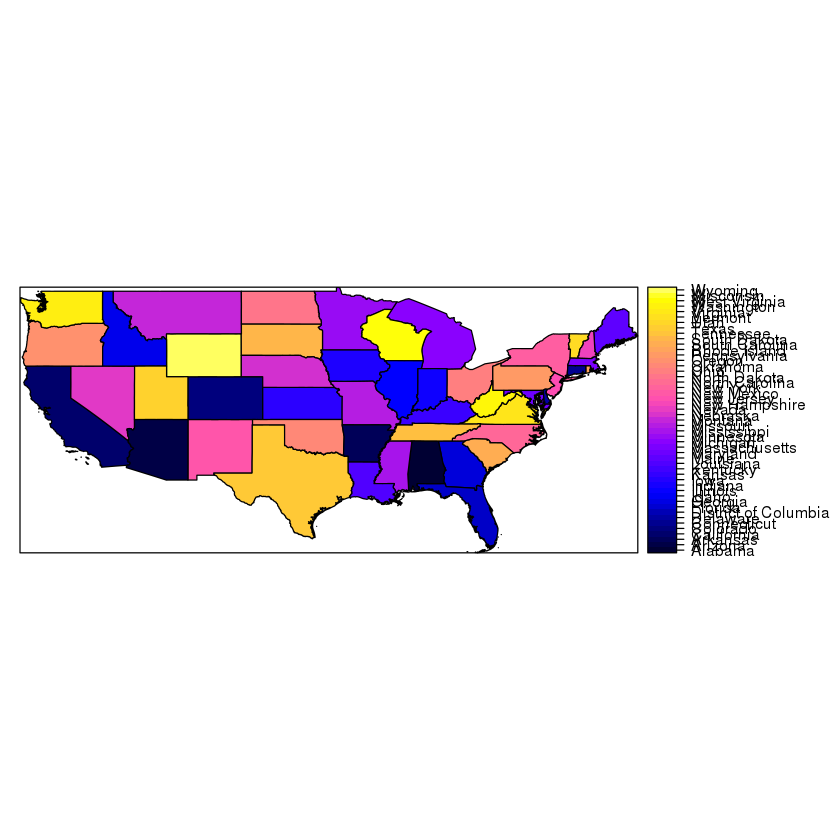

In [53]:
spplot(states_df)

In [ ]:
#Plot the data with the color as the population 
# Ref: http://gis.stackexchange.com/questions/36877/how-do-i-change-the-polygon-fill-color-and-border-color-for-spatialpolygons-obje
plot(Spol_df)
points(Spol_df$lon,Spol_df$lat, col="red")

In [ ]:
head(Spol_df)

# SAVE YOUR NOTEBOOK